In [6]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import Riesz as R
s=2
RS=R.RieszSearcher(s)

In [7]:
d=2 
N=4
max_iter=401
epsilon= .00001
alpha=.1
cnf= np.random.rand(d+1,N)-.5
cnf = R.proj(cnf)
x = torch.from_numpy(cnf).requires_grad_()

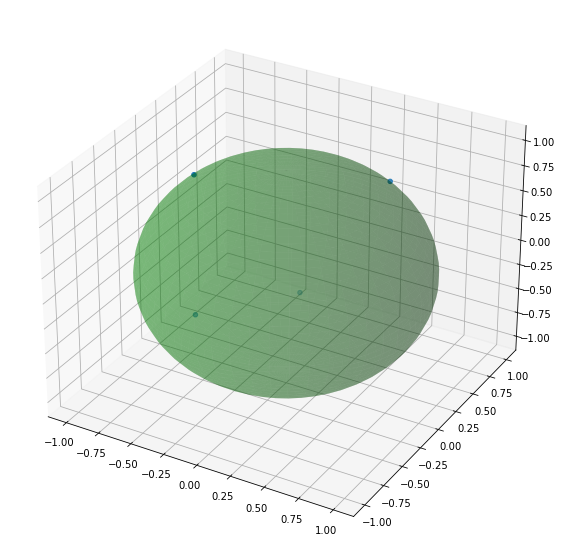

0 5.609152317047119 0.3744167387485504
1 5.24953556060791 0.06850448995828629
2 5.103076934814453 0.02870006300508976
3 5.012096405029297 0.01815219037234783
4 4.947577476501465 0.013040509074926376
5 4.897007942199707 0.010326619260013103
6 4.8538994789123535 0.008881201967597008
7 4.814767360687256 0.008127519860863686
8 4.7778520584106445 0.007726338692009449
9 4.742457389831543 0.007463360205292702
10 4.708544731140137 0.007202364969998598
11 4.676449775695801 0.006863102782517672
12 4.646661281585693 0.006410730537027121
13 4.619663238525391 0.005844158120453358
14 4.595819473266602 0.005188142415136099
15 4.575313091278076 0.004481962416321039
16 4.558135986328125 0.003768449416384101
17 4.5441107749938965 0.0030864588916301727
18 4.532933235168457 0.0024658513721078634
19 4.524222373962402 0.0019253831123933196
20 4.517574787139893 0.0014714945573359728
21 4.512596130371094 0.0011032798793166876
22 4.508930206298828 0.000813036342151463
23 4.506270885467529 0.0005901377880945802

In [8]:
RS.plot(x)
x = torch.from_numpy(cnf)
new_x,energy,dic,enr_dic=RS.pgd(x,max_iter,epsilon,alpha,display=1)

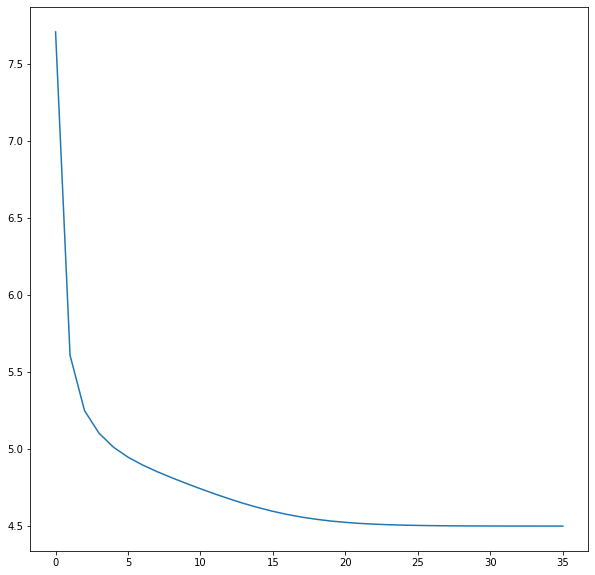

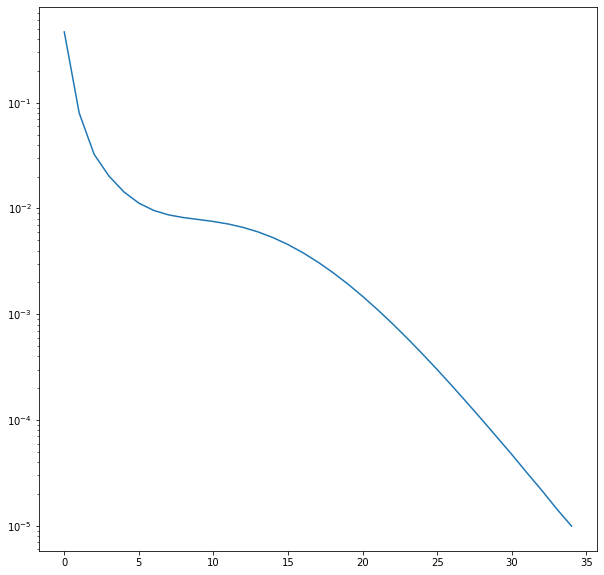

In [11]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot()
ax.plot(enr_dic)
plt.show()

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot()
ax.set_yscale('log')
ax.plot((enr_dic[0:-1]-enr_dic[1:])/enr_dic[-1])
plt.show()

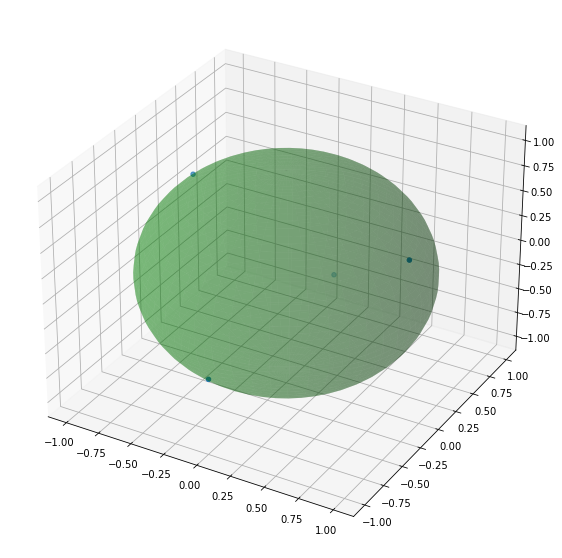

In [12]:
RS.plot(new_x)